## Ranga Bashyam G - M.Sc. Datascience

#### Q1 . Illustrate the K-means clustering with a suitable identified choice of K for mall-data and  drawing inferences related to the resulting cluster.

### Import Required Libraries 

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Load Mall dataset & print .head()

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Use .columns to view all the columns in the dataset

In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Use .isnull().sum() to viwe the null values

In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Pre-Processing

### Drop 'CustomerID' , as it doesnt contribute in the project

In [5]:
df = df.drop('CustomerID', axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Encode categorical variables

In [6]:
# Convert 'Genre' column to numerical values: 'Male' -> 0, 'Female' -> 1
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### Renaming columns - made is easy to call the feature

In [7]:
df.rename(columns={'Annual Income (k$)': 'annual_income', 'Spending Score (1-100)': 'spending_score'}, inplace=True)

In [8]:
# Display the first few rows to verify changes
print(df.head())

   Genre  Age  annual_income  spending_score
0      0   19             15              39
1      0   21             15              81
2      1   20             16               6
3      1   23             16              77
4      1   31             17              40


### Extracting features for clustering

In [10]:
X = df[['annual_income', 'spending_score']]

### Finding the optimal number of clusters using the Elbow method

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Plotting the Elbow graph

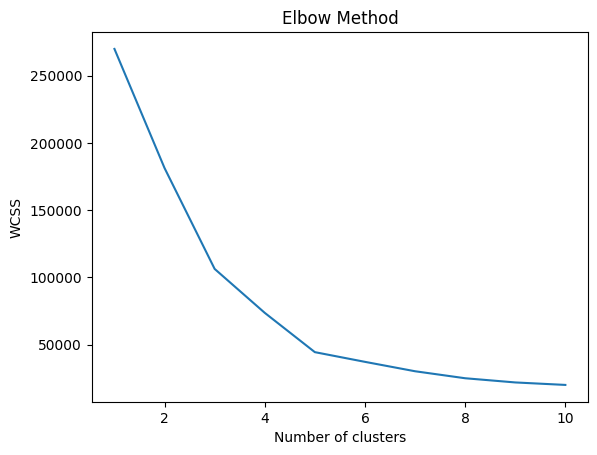

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Assuming the elbow point suggests K = 5 as the elbow falls between 4 & 6

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

### Adding the cluster labels to the original dataframe

In [14]:
df['cluster'] = y_kmeans

In [16]:
# Display the first few rows to see the cluster assignments
print(df.head())

   Genre  Age  annual_income  spending_score  cluster
0      0   19             15              39        4
1      0   21             15              81        2
2      1   20             16               6        4
3      1   23             16              77        2
4      1   31             17              40        4


### Visualizing the clusters

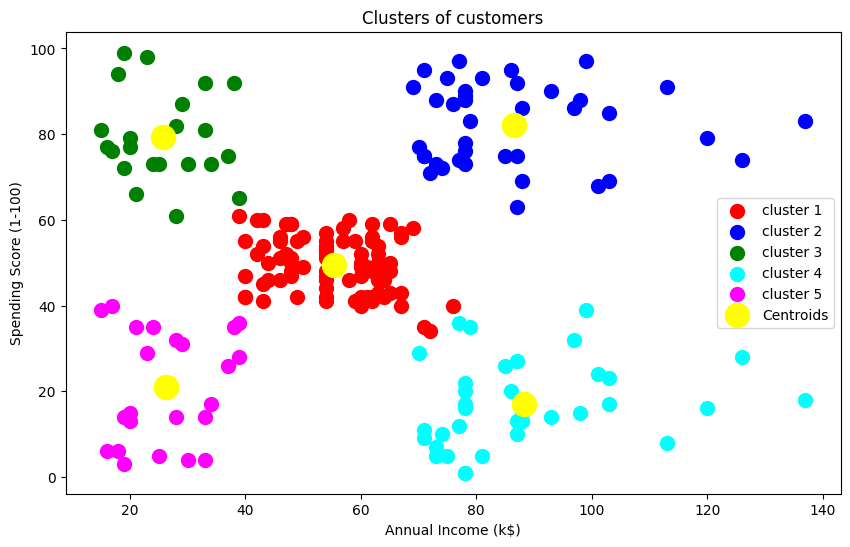

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100, c='red', label='cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100, c='blue', label='cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100, c='green', label='cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s=100, c='cyan', label='cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s=100, c='magenta', label='cluster 5')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Silhouette Score Interpretation

- **Close to +1**: Indicates that the sample is far away from the neighboring clusters, indicating good clustering.
- **Close to 0**: Indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
- **Negative Values**: Indicate that samples might have been assigned to the wrong cluster.


In [17]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"The average silhouette score for the clustering is: {silhouette_avg}")

The average silhouette score for the clustering is: 0.553931997444648


### Conclusion

- **Moderately Good Clustering**: A silhouette score of approximately 0.55 suggests that the clusters are reasonably well-defined. While the score isn't extremely high (close to +1), it still indicates that most samples are closer to their own cluster's centroid than to the centroids of other clusters.

- **Distinct Cluster Formation**: The score above 0.5 generally implies that the clusters are distinct, with clear separations between them. However, there might still be some overlap or boundary cases where samples lie close to the decision boundaries between clusters.
